In [ ]:
# NOTE: THIS PART REUSES THE MIDTERM
# CELL 5 IS WHERE THE FINAL PROJECT ANALYSIS BEGINS

In [1]:
# cell1
data <- read.csv("train.csv.gz")
# Taking the train file and giving it the variable name data
#data

#length(data[,1])
#42000

pixels <- data.frame(data[,-1])
# we want to remove the first column from the file, so we only have pixel data
head(data,10)
#smoothScatter(pixels)

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


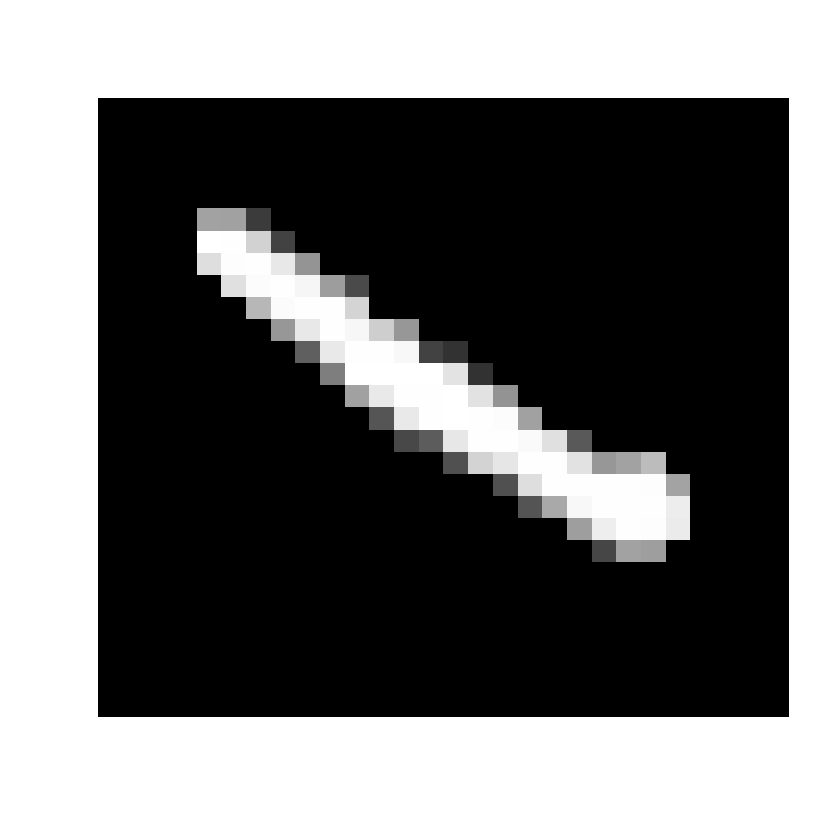

In [2]:
#cell2
# This cell is to test out how to turn one row into a matrix and turn it
# into the image
# Then we will make a function and a for loop to do this for every row 

label1 <- pixels[1,]
# now getting the first row into a variable called label1
# this is just to visualize the frist row as its own data set

#mode(label1)
mode(label1) = "numeric"
# now we need to make the mode of this label1 data into numeric so it works with
# the image method


my_label1 <- matrix(label1, nrow=28, byrow= TRUE)
# this turns our label into a 28x28 matrix 

#par(mar= c(5,5,5,5))
image(my_label1, axes =FALSE, col = grey.colors(256, start =0, end=1))
# and now we can print the values in the matrix as an image
# where 0 is black and 256 is white, and anything inbetween as shades of grey
# this prints the image also

#my_label1

# next we print the matrix 

#matplot((my_label1), type= "l")


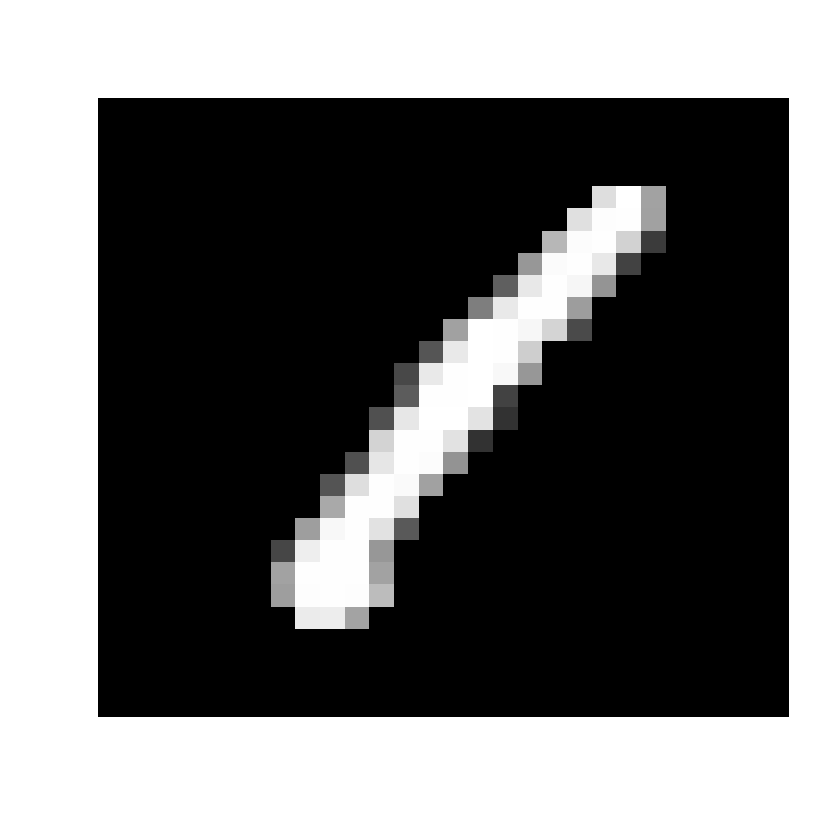

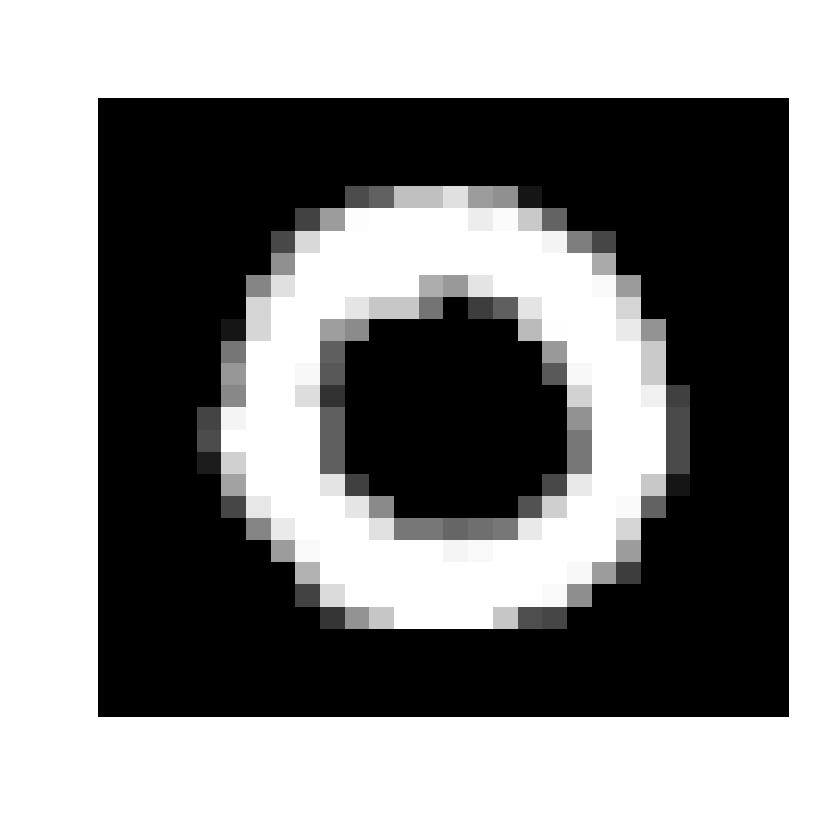

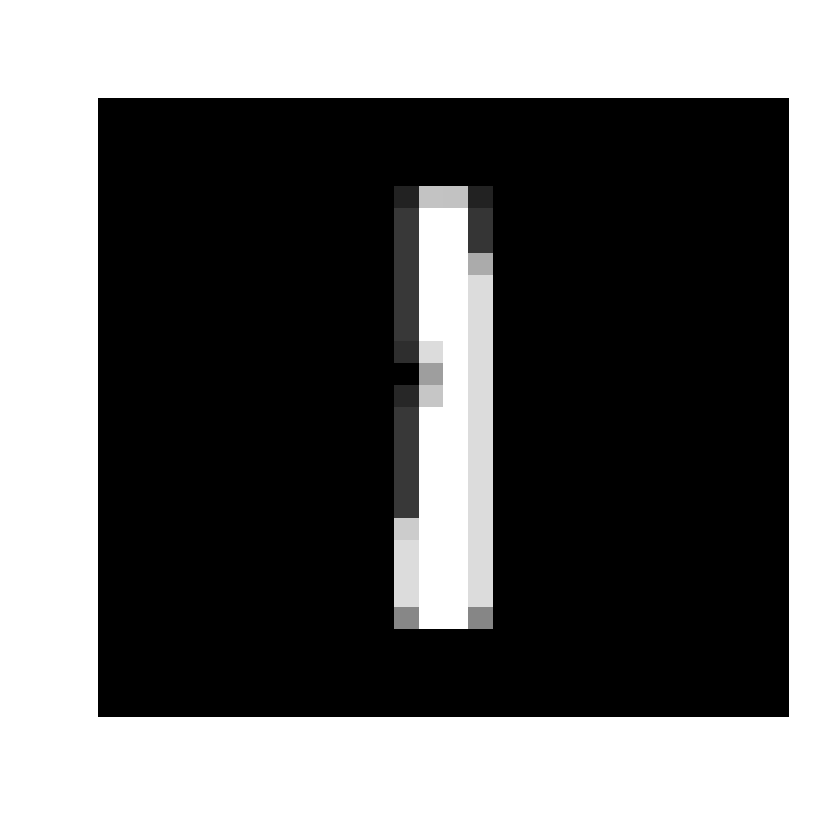

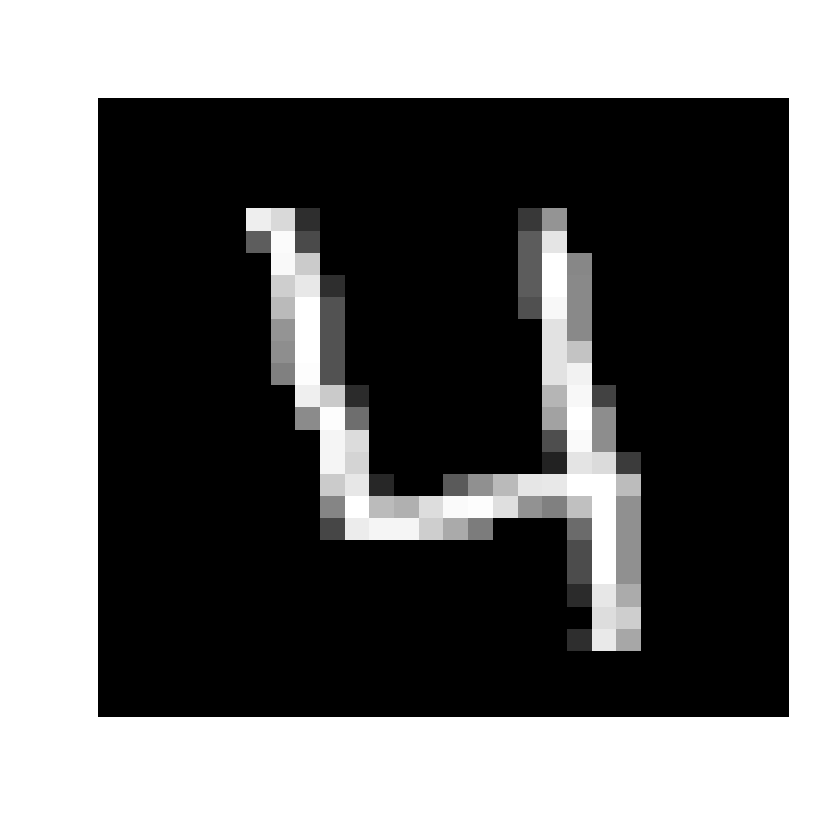

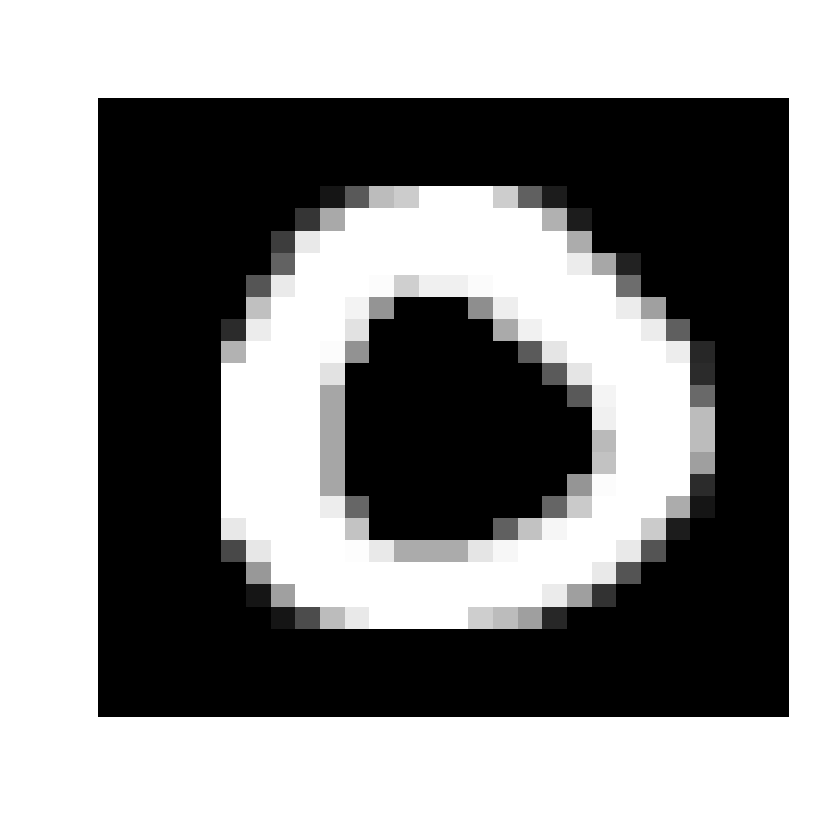

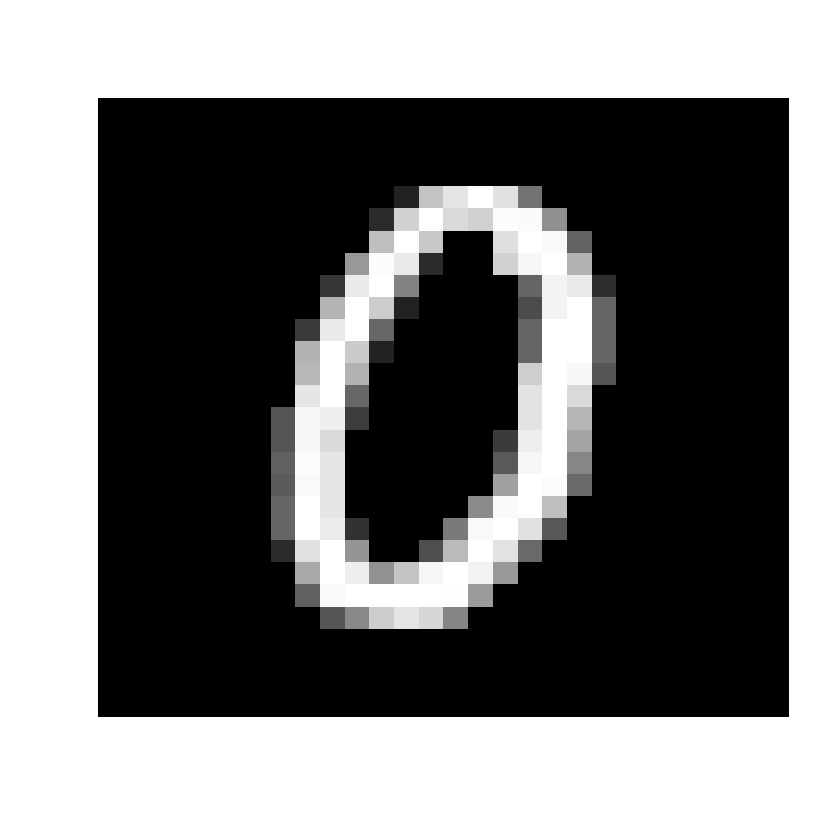

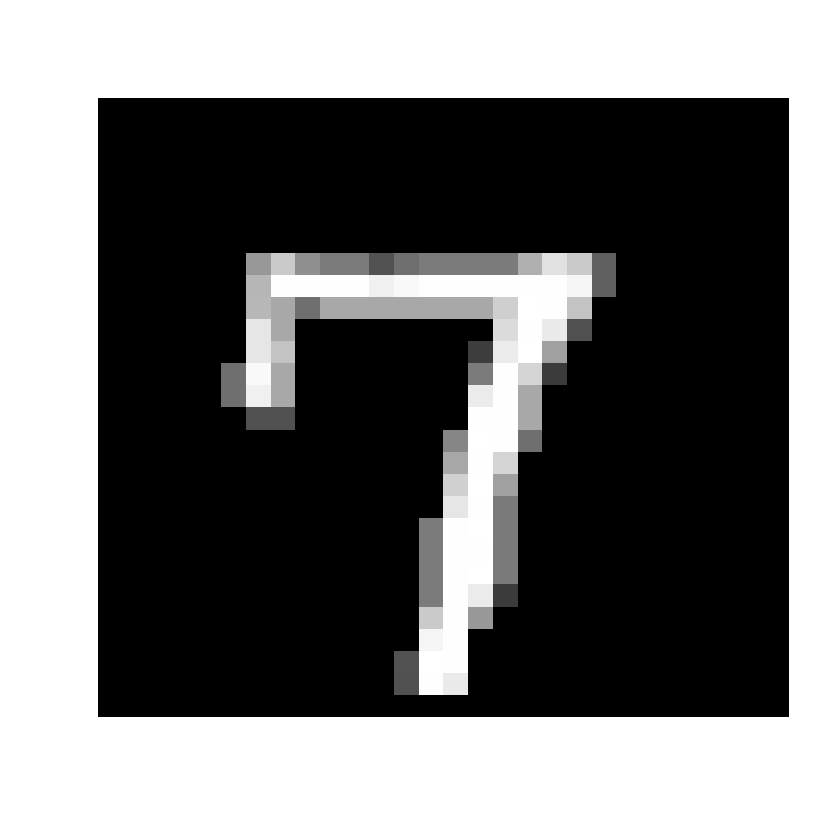

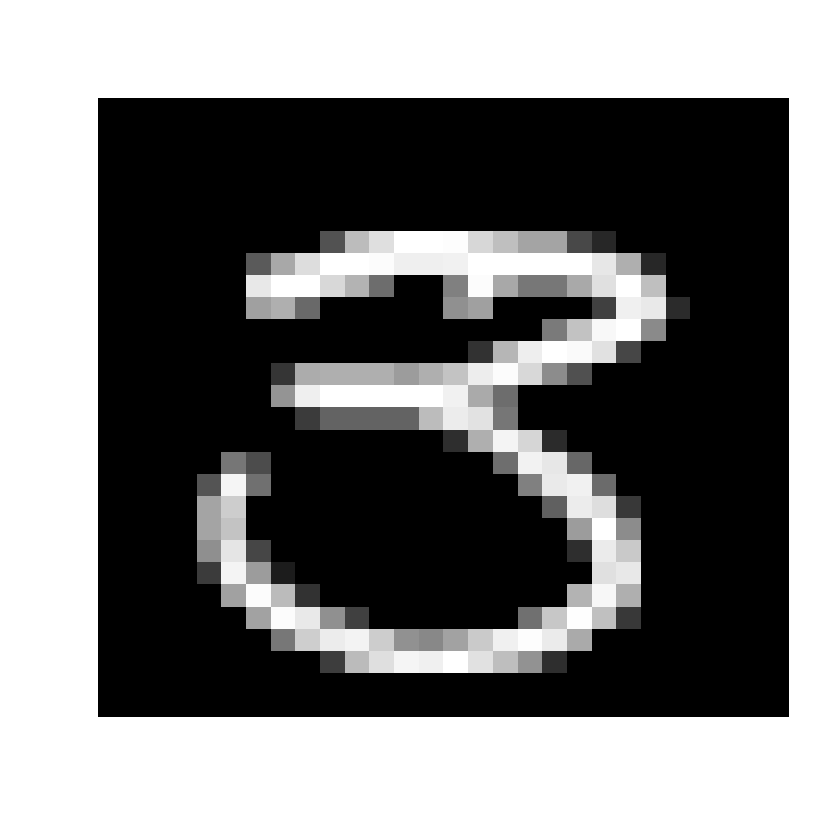

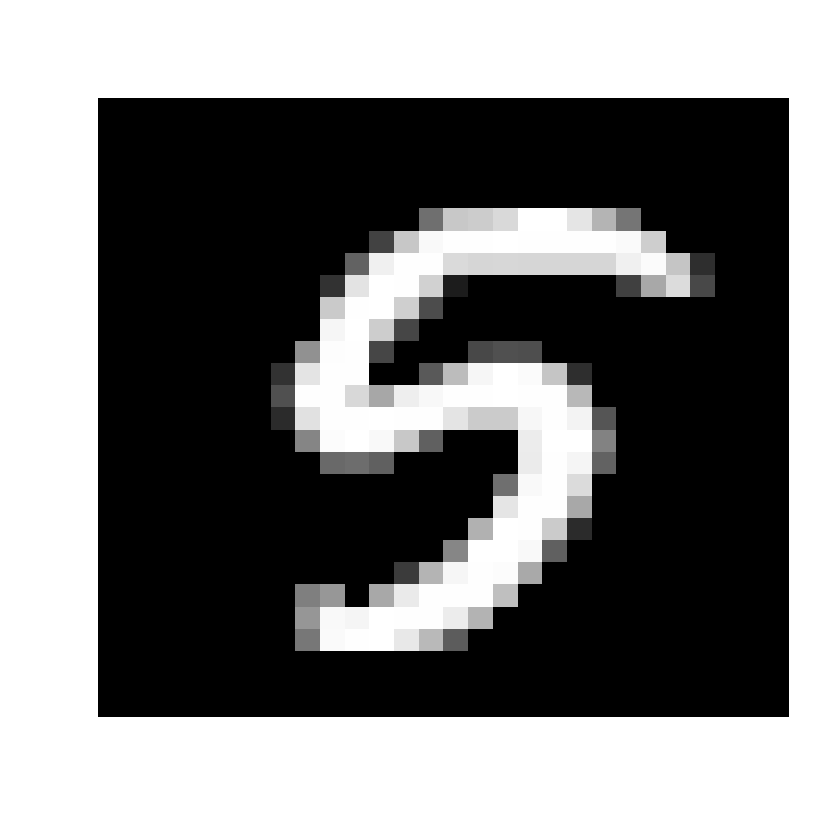

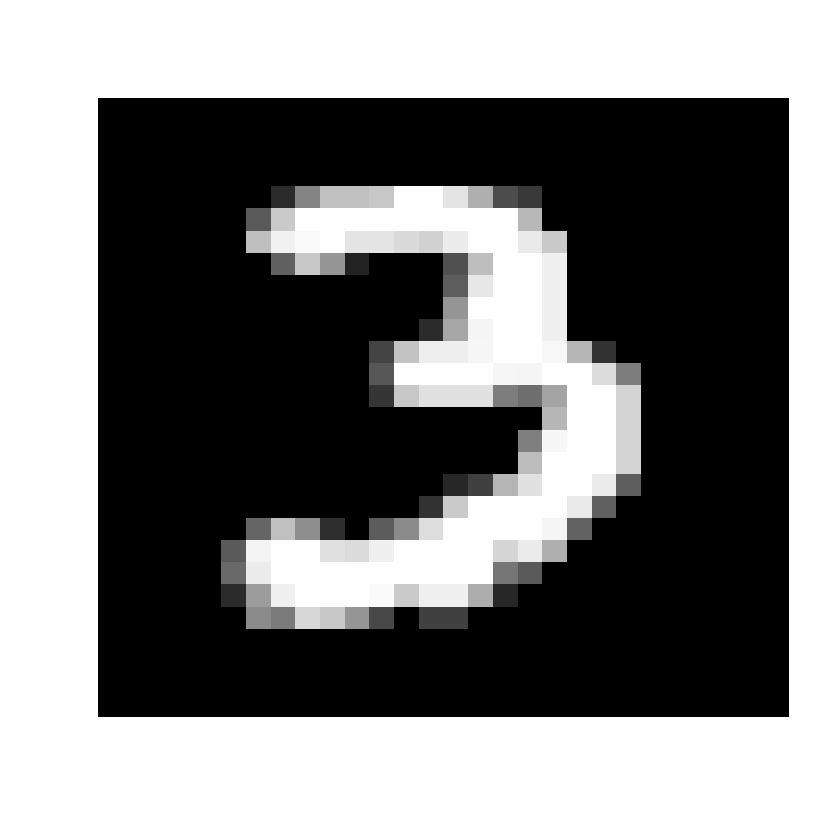

In [3]:
#cell3
# number 1

# this cell is where we do the same as the above cell but for every row

r  <- c(1:length(pixels[,1]))
# we want to make a variable that keeps track of how many rows are 
# in the pixels dataframe

for (x in r){
    # now we want to loop through each number in r, which represents the 
    # current row in the dataframe pixels
    
    label1 <- pixels[x,]
    # next we want to pass that entire row into the variable 
    # called label1
    
    mode(label1) = "numeric"
    # we need to change the mode of each number in that row to numeric
    # so the image method can work with it
    
    my_label1 <- matrix(rev(label1), nrow=28, byrow= FALSE)
    # now we make that row into a 28x28 matrix called my_label1
    
    
    my_label1 <- apply(my_label1,2,rev)
    
    #par(mar= c(5,5,5,5))
    image(my_label1, axes =FALSE, col = grey.colors(256, start =0, end=1))
    # now we use image to plot all the points in the matrix
    # 0 being black and 256 being white, and everything inbetween being
    # shades of grey
    #my_label1
    if (x ==10){ break }
    # since there are 64k rows, we used a break statement at 10 
    # just to see how the first 10 hand written digits looked
    # the code will run much longer if we had not done this
    # in the next few cells we take the average of each number 
    # which is much better at combining all of the data into 
    # smaller parts
    
}

In [4]:
#cell4
# number 2 
n <- c(0:9)
# we want to keep track of all the digits that correspond to 
# a handwriting. from 0 to 9 as the variable n

for (x in n){
    # next we loop through each digit
    
    assign(paste0("label_",x), data[grep(x,data[,1]),])
    # we use assign to put all the data that we wish to grep into 
    # a variable. we use paste0 to create variable names dynamically
    # then grep to get the digit which is the pattern that 
    # the current loop is on from the first column. we then put
    # that entire row that matches the current digit into a variable
    # then the loop moves onto the next digit.
    
}
#label_0
#label_1
# here we show that it works for label_1 and before that we checked
# to see if it works for label_0 which it does.
# So this code will work for all label_(0-9)



#data[grep("0", data[,1]),]

In [5]:
#cell 5

# final project number 1
test <- data.frame(my_label1)
#test
# note: i am using "my_label1" variable from the 3rd cell. this variable contains
# uses code that gets information from the first 10 rows in the pixel data
# the last pixel data ends up being the digit "3"


# so the digit we are looking to run pca on is 3


list_to_remove <- c()

for (x in c(1:length(test))){
    
    if (var(test[,x]) == 0) {
        list_to_remove <- append(list_to_remove, x)
    }
    
}
list_to_remove
# I used this for loop to find all the columns that has a variance of 0 and put
# the column number into the list_to_remove variable. now i will edit the 
# matirx test and remove those columns

test_update <- test[,-(list_to_remove)]

test_update
# this is now only the data frame that consists of only columns with variances

[1]  1  2  3  4 25 26 27 28

X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,5,36,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67,87,215,231,33,0,0,0,0,0,0,0,0,0,0,0,0,135,25,0
50,223,253,253,136,0,0,0,0,0,0,0,0,0,0,0,30,225,152,5
176,253,253,253,70,0,0,0,0,0,0,0,0,0,0,0,149,244,253,60
148,253,253,191,6,0,0,0,0,0,0,0,0,0,0,0,78,253,253,136


[1] 785

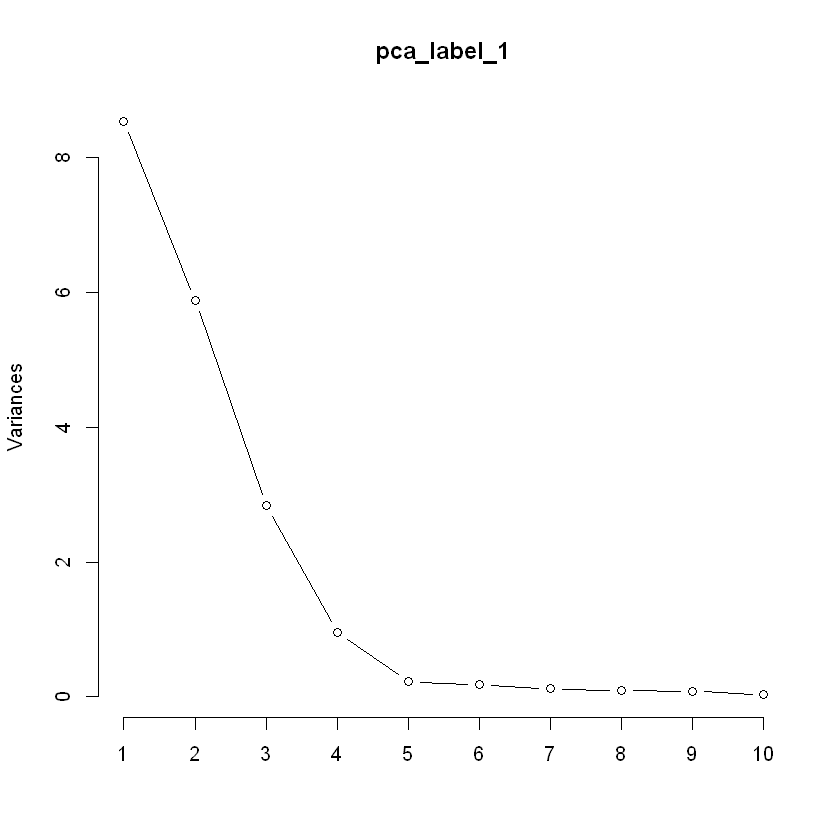

In [6]:
length(label_1)

pca_label_1 <- prcomp(test_update[,c(2:length(test_update))], center = TRUE, scale. = TRUE)

#summary(pca_label_1)

# from pc1- pc496? the standard deviation goes below 0.05 after that

#plot(pca_label_1$x[,1],pca_label_1$x[,2])

#biplot(pca_label_1, scale =0)
# use screeplot, find the pc cut off that contains 90% of the variance
# and convert it back to the data to see how the digits look

screeplot(pca_label_1, type = "lines")

#new_label_1 <- label_1[,c(2:496)]
#new_label_1

In [7]:
standard_dev <- pca_label_1$sdev
# this is getting the standard deviation

var_label_1 <- standard_dev^2
# this is to get the variance of the pc
#var_label_1[1:10]

prop_var <- var_label_1/sum(var_label_1)
prop_var[1:3]
# this shows the proportion of variance explained


sum(prop_var[1:3])
# the first 3 pc (principal components) consist of 90% of the variance

# so now i need to take the first 35 pc and convert them back into the original 
# data and see how the digit looks.

[1] 0.4493236 0.3094973 0.1493620

[1] 0.9081829

X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
-0.7275113,-0.7473491,-0.8536929,-0.6584437,-0.53411468,-0.4933435,-0.442758627,-0.4225221,-0.36429403,-0.623359416,-0.7090114,-0.6157585,-0.4323511,-0.4221338,-0.3979941,-0.51952138,-0.8839697,-0.7922597,-0.6110443
-0.7275113,-0.7473491,-0.8536929,-0.6584437,-0.53411468,-0.4933435,-0.442758627,-0.4225221,-0.36429403,-0.623359416,-0.7090114,-0.6157585,-0.4323511,-0.4221338,-0.3979941,-0.51952138,-0.8839697,-0.7922597,-0.6110443
-0.7275113,-0.7473491,-0.8536929,-0.6584437,-0.53411468,-0.4933435,-0.442758627,-0.4225221,-0.36429403,-0.623359416,-0.7090114,-0.6157585,-0.4323511,-0.4221338,-0.3979941,-0.51952138,-0.8839697,-0.7922597,-0.6110443
-0.7275113,-0.7473491,-0.8536929,-0.6584437,-0.53411468,-0.4933435,-0.442758627,-0.4225221,-0.36429403,-0.623359416,-0.7090114,-0.6157585,-0.4323511,-0.4221338,-0.3979941,-0.51952138,-0.8839697,-0.7922597,-0.6110443
-0.7275113,-0.7473491,-0.8536929,-0.6584437,-0.53411468,-0.4933435,-0.442758627,-0.4225221,-0.36429403,-0.623359416,-0.7090114,-0.6157585,-0.4323511,-0.4221338,-0.3979941,-0.51952138,-0.8839697,-0.7922597,-0.6110443
-0.6048609,-0.6352856,-0.7529194,-0.6427501,-0.54699252,-0.4957419,-0.441112470,-0.4201465,-0.36208572,-0.624709674,-0.7134829,-0.6247654,-0.4450416,-0.4349878,-0.4104794,-0.49342269,-0.7804297,-0.6980009,-0.5516604
0.5476336,0.4146480,0.2466798,-0.4225703,-0.57401439,-0.4407446,-0.392990638,-0.3833132,-0.36371630,-0.730569665,-0.7734560,-0.6800830,-0.4386074,-0.4278186,-0.3870559,-0.07045077,0.2900132,0.2106170,-0.0866271
1.3405545,1.1564015,0.9922401,-0.1620609,-0.49785690,-0.3792599,-0.373716435,-0.3821489,-0.40652471,-0.781457974,-0.7347916,-0.6096159,-0.3229128,-0.3125153,-0.2645941,0.31048082,1.0930161,0.8899051,0.2659120
1.7183426,1.4916277,1.3530434,-0.0540572,-0.44703767,-0.2977867,-0.327356425,-0.3540902,-0.42160598,-0.918909389,-0.8006449,-0.6349312,-0.2336473,-0.2204755,-0.1535044,0.59381143,1.5180477,1.1932668,0.3170125
1.6943396,1.4996481,1.2421715,-0.1505307,-0.61437851,-0.4939950,-0.433005972,-0.4179069,-0.39645565,-0.617568926,-0.6570118,-0.5993732,-0.4774271,-0.4718765,-0.4467543,0.16691615,1.2848985,1.1665070,0.6131982


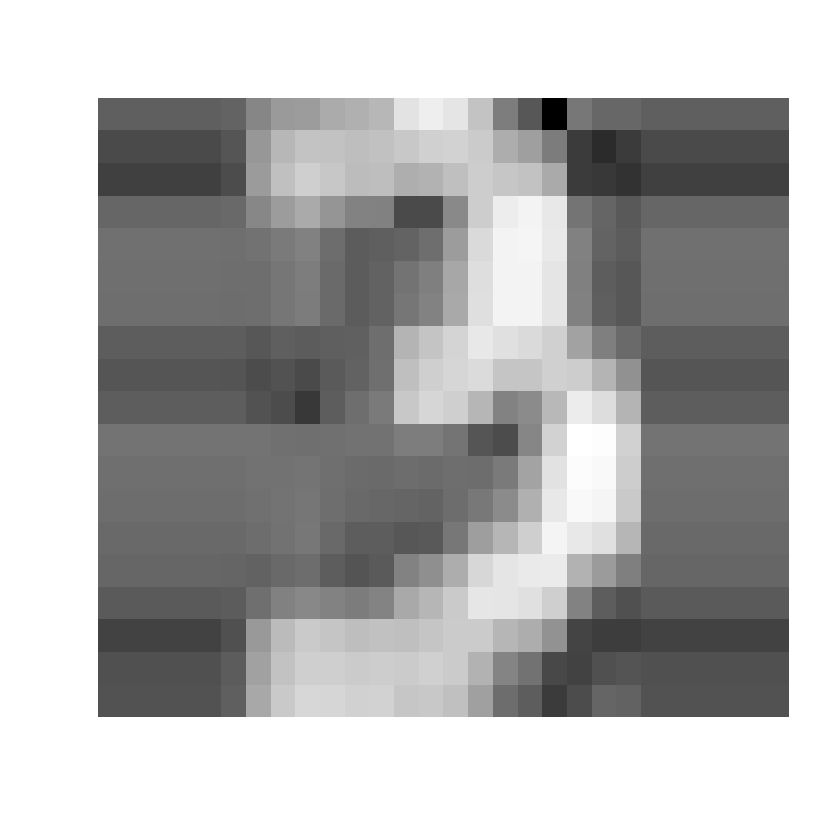

In [8]:
# number 1

pc.use <- 4

reconstructed <- pca_label_1$x[,1:pc.use] %*% t(pca_label_1$rotation[,1:pc.use])

reconstructed
# this is the final matrix, within the variable reconstructed 


image(reconstructed, axes =FALSE, col = grey.colors(256, start =0, end=1))
# even though the above cell shows that 3 principal components account for
# 90% of the variance, i think using 4 is able to reproduce the digit really
# well

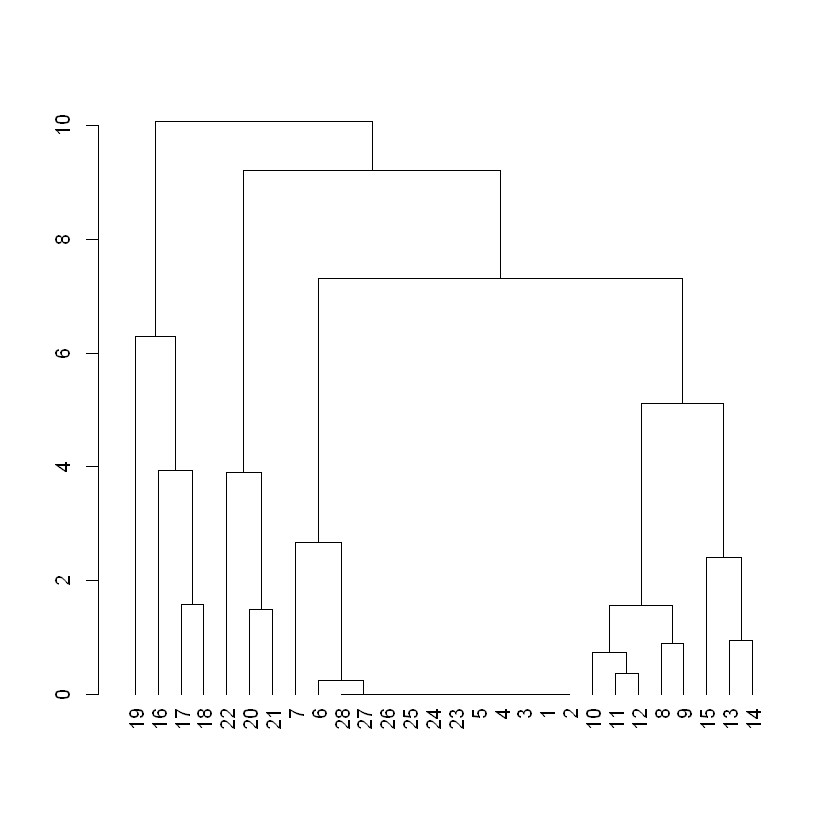

In [9]:
# number 2 

dist_recon <- dist(reconstructed)

# finding the distances of each row to use in the hclust function

pc_hclust <- hclust(dist_recon, method='complete')


plot(as.dendrogram(pc_hclust))
# next plotting the hclust data as a dendrogram to visualize the relationships
# between each row.

# this clusters based on the rows
# what i can see is that in the center of the dendro gram we have the top 
# rows 1,2,3,4,5,6,7 being clustered together with the bottom rows 23,24,25,26,
# 27,28 so this shows they have about the same distance values.
# next we see that the bottom middle rows are clustered together on the left
# of the dendro gram which are rows 16,17,18,19,20,21,22.
# lastly, we see on the right of the dendrogram the top middle rows are clustered
# together and the rows are 8,9,10,11,12,13,14,15


# NOTE: maybe i can try finding the distance of the columns and put that data
# with the distance of the rows to get a better idea of each pixel somehow.

[1] 2066

In [12]:
# THOUGHT PROCESS GOING INTO MAKING THE NEXT CELL
# maybe we can use pca results instead
# we can take the average of each digit and find how many pc(principal components)
# are needed to recreate 90% of the variance of the average
# then take one single digit and see if that single digit needs to use
# the same amount of pc to recreate 90% of the variance also
label_1[1,1]

[1] 1

In [10]:
# NUMBER 3 complete with written responce at the end of this cell

# this cell is from the midterm. we are using it to get the averages of digits


# this code it to just take the average of one single label number which is 
# label_0. we are doing this just to test on one lable then will make a 
# function in this cell to pass in all the labels_(0-9)


    


func_make_pc <- function (label){

pixel_label_0  <- label[,-1]
# taking all the data that has label hand writting as 0 and removing
# the first column so we only have the pixels that represent 0
# and we put that into a variable called pixel_label_0

#length(pixel_label_0)
c <- c(1:length(pixel_label_0))
# now we want to make a variable that keeps track of every a number from
# 1 to the max length of the columns this data consists

ave_pix <- c()
# we want to have an empty list ready for when we want to append the 
# average values of each column 

for (x in c){
    # we want to loop through my c variable with x, then we will make
    # x the column in the variable pixel_label_0

    #pixel_label_0[,x]
    ave_pix <- append(ave_pix,mean(pixel_label_0[,x]))
    # with each for loop we will look at the column and take the mean of
    # that entire column, then append the mean to the variable ave_pix
}

matrix_ave_pix <- matrix(rev(ave_pix), nrow=28, ncol=28)
# here we take the list of means from ave_pix to make a matrix, where 
# each entry represents the mean number for each column in the 
# dataset labeled 0.

matrix_ave_pix <- apply(matrix_ave_pix,2,rev)
matrix_ave_pix

# UNCOMMENT THE BELOW CODE TO SEE THE IMAGE
#image(matrix_ave_pix, axes = FALSE, col = grey.colors(256, start=0, end=1))

# here we plot the matrix using image function, and make the colors
# shades of grey
#pixel_label_0


#THIS NEXT PART MAKES THE AVERAGE PIX INTO A MATRIX FOR PCA 
    
     
# reused code from making pca of label 3 to make one of label 0
# at the end i found a way to automate the process of finding the least amount 
# of pc's when added up gives 90%


test <- data.frame(matrix_ave_pix)
#test
# note: i am using "my_label1" variable from the 3rd cell. this variable contains
# uses code that gets information from the first 10 rows in the pixel data
# the last pixel data ends up being the digit "3"


# so the digit we are looking to run pca on is 3


list_to_remove <- c()

for (x in c(1:length(test))){
    
    if (var(test[,x]) == 0) {
        list_to_remove <- append(list_to_remove, x)
    }
    
}
list_to_remove
# I used this for loop to find all the columns that has a variance of 0 and put
# the column number into the list_to_remove variable. now i will edit the 
# matirx test and remove those columns

test_update <- test[,-(list_to_remove)]
test_update

pca_label_0 <- prcomp(test_update[,c(2:length(test_update))], center = TRUE, scale. = TRUE)

# automate the below code to find how many pc equal 90%
standard_dev <- pca_label_0$sdev
# this is getting the standard deviation

var_label_0 <- standard_dev^2
# this is to get the variance of the pc
#var_label_1[1:10]

prop_var <- var_label_0/sum(var_label_0)
#prop_var[1:3]
# this shows the proportion of variance explained

# this while loop automates the proces of finding the least amount of
# pc's variances which add up to equal 90%
x <- 1
while (sum(prop_var[1:x])*100 < 90){
    x=x+1
}
    
# this keeps track of how many pc's it takes to create 90% of the variances 
# for the average label data
#print(length(prop_var[1:x]))

print(sum(prop_var[1:x]))
assign(paste0("digit_",label[1,1]),  (length(prop_var[1:x])))

#digit_1
# here i am assigning the first column and row as the variable number when
# creating the variable. that way i can keep track of how many pc's are in
# each variable passed through the function
#sum(prop_var[1:3])

# now that i know 4 pc's is the least amount when added gives 90% of the 
# variance information for the label 0 when averaged
# i can now look at an individual digit to see whether it will also need 
# about 4 pc's to give its variance
# thus this will be my way of quickly classifying which digit i was given
# based on this quick calculation.






}

avg_digit_0_pc <- func_make_pc(label_0)
avg_digit_1_pc <- func_make_pc(label_1)
avg_digit_2_pc <- func_make_pc(label_2)
avg_digit_3_pc <- func_make_pc(label_3)
avg_digit_4_pc <- func_make_pc(label_4)
avg_digit_5_pc <- func_make_pc(label_5)
avg_digit_6_pc <- func_make_pc(label_6)
avg_digit_7_pc <- func_make_pc(label_7)
avg_digit_8_pc <- func_make_pc(label_8)
avg_digit_9_pc <- func_make_pc(label_9)


cat("the pc for 0 is :", avg_digit_0_pc,"\n")
cat("the pc for 1 is :",avg_digit_1_pc,"\n")
cat("the pc for 2 is :",avg_digit_2_pc,"\n")
cat("the pc for 3 is :",avg_digit_3_pc,"\n")
cat("the pc for 4 is :",avg_digit_4_pc,"\n")
cat("the pc for 5 is :",avg_digit_5_pc,"\n")
cat("the pc for 6 is :",avg_digit_6_pc,"\n")
cat("the pc for 7 is :",avg_digit_7_pc,"\n")
cat("the pc for 8 is :",avg_digit_8_pc,"\n")
cat("the pc for 9 is :",avg_digit_9_pc,"\n")

# this is how we will build our classifier. We know that the average of each 
# digit represents gives us a number of pc's that will add up to 90% 
# variance
# so when we use the same code but only plug in one single digit we should expect
# that that digit would need the same amount of pc's as its averaged counterpart
# to make 90% of the variances also.

# additional thing i noticed is that the odd numbers all needed 2 pc's while the
# even numbers needed 3 pc's 
# so we can definitely at least try to classify wheather the digit is even
# or odd based on this information
# and the only digit we can classify is a 0, this is because its the only 
# digit that requires above 3 pc's to get to 90% variance

[1] 0.9483771
[1] 0.9238257
[1] 0.9710878
[1] 0.9446342
[1] 0.9704346
[1] 0.9395174
[1] 0.967781
[1] 0.9023977
[1] 0.9554669
[1] 0.9493153
the pc for 0 is : 4 
the pc for 1 is : 2 
the pc for 2 is : 3 
the pc for 3 is : 2 
the pc for 4 is : 3 
the pc for 5 is : 2 
the pc for 6 is : 3 
the pc for 7 is : 2 
the pc for 8 is : 3 
the pc for 9 is : 2 


In [11]:
new_pixel <- data.frame(data)
#test_pixel <- new_pixel[9,]
#test_label <- new_pixel[9,1]
#cat("this is the unknown digit: ", test_label, "\n")


#unknown_digit_pc <- func_make_pc(test_pixel)
#cat("this is the pc for the unknown digit: ", unknown_digit_pc, "\n")


# the average pc of the same digit fed into the classifier should be roughly 
# equal to the average pc we see in the cell above.

# so lets take 10 to 20 digits labeled 1 and see if it pc average ends up
# being 2, as seen as above.

# this code below looks through the entire original data set. then finds
# all of the row numbers that have the digit i will be testing 
# next it takes only the first 10 of the rows numbers
new_test_df <- c()
for (x in c(1:length(new_pixel[,1]))){
if (new_pixel[x,1] == 1){
    # here is where we choose which digit to use
    new_test_df <- append(new_test_df, x)
    
}

}
#length(new_test_df)/2
# i tried to do half of the digit data as tests but it doesnt work
only_20_of_digit <- sample(new_test_df, 20)
#only_20_of_digit <- new_test_df
#only_20_of_digit

# now i want to loop through the row numbers with the function to get each
# pc for the digit. note all the digits should be the same
# we will then take the average of all 20 pc and hope it equals the 
# above average pc's for that number

take_avg <- c()
for (x in only_20_of_digit){
new_pixel <- data.frame(data)
test_pixel <- new_pixel[x,]
test_label <- new_pixel[x,1]
cat("this is the unknown digit: ", test_label, "\n")


unknown_digit_pc <- func_make_pc(test_pixel)
cat("this is the pc for the unknown digit: ", unknown_digit_pc, "\n\n")
take_avg <- append(take_avg, unknown_digit_pc)
}

# as you can see the unknown digits are 1 like we want
# now to take the average of each pc which is,
new_list_avg <- c()
for (x in c(1:length(take_avg))){
if (take_avg[x]< 5){
    new_list_avg <- append(new_list_avg,take_avg[x])
}
}
new_list_avg
mean(new_list_avg)
# i wanted to remove any pc's that were above 4, because they would be outliers
# interferring with the classifier.
# none of the average pc's reached above 5.

this is the unknown digit:  1 
[1] 0.90721
this is the pc for the unknown digit:  4 

this is the unknown digit:  1 
[1] 0.9417889
this is the pc for the unknown digit:  4 

this is the unknown digit:  1 
[1] 0.9328796
this is the pc for the unknown digit:  3 

this is the unknown digit:  1 
[1] 0.904581
this is the pc for the unknown digit:  5 

this is the unknown digit:  1 
[1] 0.903382
this is the pc for the unknown digit:  5 

this is the unknown digit:  1 
[1] 0.9897542
this is the pc for the unknown digit:  2 

this is the unknown digit:  1 
[1] 0.9494501
this is the pc for the unknown digit:  2 

this is the unknown digit:  1 
[1] 0.9562665
this is the pc for the unknown digit:  2 

this is the unknown digit:  1 
[1] 0.9641385
this is the pc for the unknown digit:  2 

this is the unknown digit:  1 
[1] 0.9708957
this is the pc for the unknown digit:  3 

this is the unknown digit:  1 
[1] 0.9395901
this is the pc for the unknown digit:  3 

this is the unknown digit:  1 
[1] 0

[1] 4 4 3 2 2 2 2 3 3 3 4 2 1 3 2 4 4 3

[1] 2.833333